In [1]:
!pip install qutip

import matplotlib.pyplot as plt
import numpy as np
import qutip
import defs
import helpers_qutip

# QuTip Settings
qutip.settings.num_cpus = 4

# Helper Functions
def extract_expect_op_trajectory(result_sme, expect_op):
    return np.array( [qutip.expect(expect_op, _rho) for _rho in result_sme.states] )    

def plot_trajectories(time, trajectories, ylabel = '$<\sigma_z>$'):
    fig, ax = plt.subplots(figsize=(6,4))
    for trajectory in trajectories:
        ax.plot(time, trajectory)
        ax.set_ylim([-1, 1])
        ax.set_xlabel('Time ($\mu$s)')
        ax.set_ylabel(ylabel)

     |████████████████████████████████| 14.6 MB 10.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Generate Trajectories

In [ ]:
# load QuTip definitions
p = defs.get_parameters(num_sites=1, num_fock=[5])
ops = helpers_qutip.Operators(p, swap_tensor_order=True)
hamiltonian = defs.get_hamiltonian(p, ops)    
c_ops = defs.get_collapse_operators(p, ops)

# time-evolution
state_plus_z  = defs.get_initial_state(p, state_qb='+z_tilde')
state_minus_z = defs.get_initial_state(p, state_qb='-z_tilde')
n_traj = 50

# trajectories
result_sme_plus_z = helpers_qutip.solve_time_evolution_trajectories(p,
                                                                    hamiltonian,
                                                                    state_plus_z, 
                                                                    c_ops=[],#[c_ops[1]],
                                                                    sc_ops=[c_ops[0]],
                                                                    ntraj = n_traj,
                                                                    nsubsteps=p.nsubsteps)

result_sme_minus_z = helpers_qutip.solve_time_evolution_trajectories(p,
                                                                    hamiltonian,
                                                                    state_minus_z, 
                                                                    c_ops=[],#[c_ops[1]],
                                                                    sc_ops=[c_ops[0]],
                                                                    ntraj = n_traj,
                                                                    nsubsteps=p.nsubsteps)


# Extract \sigma_z(t) trajectories from SME solution
trajectory_time = p.times
z_plus_sigma_z =  extract_expect_op_trajectory(result_sme_plus_z, ops.Sz[0]) 
z_minus_sigma_z = extract_expect_op_trajectory(result_sme_minus_z, ops.Sz[0]) 
np.save('datasets/trajectory_time.npy', trajectory_time)
np.save('datasets/z_plus_sigma_z.npy',  z_plus_sigma_z)
np.save('datasets/z_minus_sigma_z.npy', z_minus_sigma_z)

# Extract r(t) trajectories from SME solution
z_plus_r_t  = result_sme_plus_z.measurement
z_minus_r_t = result_sme_minus_z.measurement
np.save('datasets/z_plus_r_t.npy',  z_plus_r_t)
np.save('datasets/z_minus_r_t.npy', z_minus_r_t)

10.0%. Run time:   2.15s. Est. time left: 00:00:00:19
20.0%. Run time:   4.25s. Est. time left: 00:00:00:17
30.0%. Run time:   6.31s. Est. time left: 00:00:00:14
40.0%. Run time:   8.40s. Est. time left: 00:00:00:12
50.0%. Run time:  10.63s. Est. time left: 00:00:00:10
60.0%. Run time:  12.68s. Est. time left: 00:00:00:08
70.0%. Run time:  14.84s. Est. time left: 00:00:00:06
80.0%. Run time:  17.03s. Est. time left: 00:00:00:04
90.0%. Run time:  19.15s. Est. time left: 00:00:00:02
Total run time:  21.25s
10.0%. Run time:   2.12s. Est. time left: 00:00:00:19
20.0%. Run time:   4.32s. Est. time left: 00:00:00:17
30.0%. Run time:   6.41s. Est. time left: 00:00:00:14
40.0%. Run time:   8.61s. Est. time left: 00:00:00:12
50.0%. Run time:  10.80s. Est. time left: 00:00:00:10
60.0%. Run time:  12.90s. Est. time left: 00:00:00:08
70.0%. Run time:  15.00s. Est. time left: 00:00:00:06
80.0%. Run time:  17.22s. Est. time left: 00:00:00:04
90.0%. Run time:  19.53s. Est. time left: 00:00:00:02
Tota

In [2]:
# can also load datasets from disk if they exist
trajectory_time = np.load('datasets/trajectory_time.npy')
z_plus_sigma_z = np.load('datasets/z_plus_sigma_z.npy')
z_minus_sigma_z = np.load('datasets/z_minus_sigma_z.npy')
z_plus_r_t = np.load('datasets/z_plus_r_t.npy')
z_minus_r_t = np.load('datasets/z_minus_r_t.npy')
print(f"Loaded datsets, {z_minus_r_t.shape[0]} trajectories present.")

Loaded datsets, 5000 trajectories present.


## Generate Figures for Report

### r(t) for |0&gt; and |1&gt;

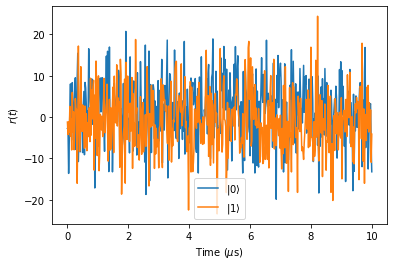

In [3]:
# plot the measurement signal vs timesteps
plt.plot(trajectory_time, np.real(z_plus_r_t[0]),  label = r'$| 0 \rangle $')  
plt.plot(trajectory_time, np.real(z_minus_r_t[1]), label = r'$| 1 \rangle $')  
plt.xlabel('Time ($\mu$s)')
plt.ylabel('$r(t)$')
plt.legend()
plt.savefig('figures/r_t.png')
plt.show()

### Integrated r(t) for |0&gt; and |1&gt;

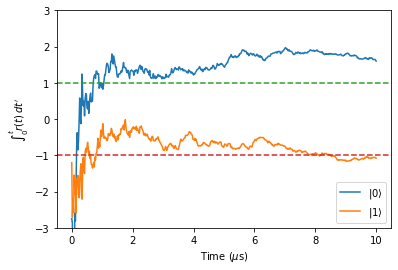

In [4]:
# get integrated "r(t)" for a single trajectory
plt.plot(trajectory_time, np.real(np.cumsum(z_plus_r_t[0])/np.arange(1, len(z_plus_r_t[0])+1)), label = r'$| 0 \rangle $')
plt.plot(trajectory_time, np.real(np.cumsum(z_minus_r_t[1])/np.arange(1, len(z_minus_r_t[1])+1)), label = r'$| 1 \rangle $')
plt.axhline(y= 1.0, color='tab:green', linestyle='dashed')
plt.axhline(y=-1.0, color='tab:red',   linestyle='dashed')
plt.ylim(-3,3)
plt.xlabel('Time ($\mu$s)')
plt.ylabel("$\int_{0}^{t} r(t) \,dt'$")
plt.legend()
plt.savefig('figures/int_r_t.png')
plt.show()

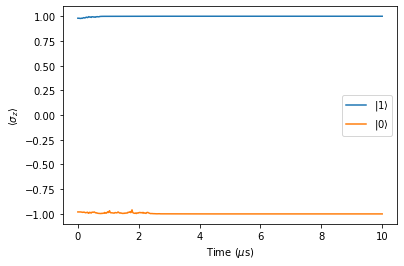

In [5]:
# plot \sigma_z for the same density matrix as above
plt.plot(trajectory_time, np.real(z_plus_sigma_z[0]), label = r'$| 1 \rangle $')
plt.plot(trajectory_time, np.real(z_minus_sigma_z[1]), label = r'$| 0 \rangle $')
plt.xlabel('Time ($\mu$s)')
plt.ylabel(r'$\langle \sigma_z \rangle$')
plt.legend()
plt.savefig('figures/int_r_t.png')
plt.show()

# Check that states are properly represented by density matrix

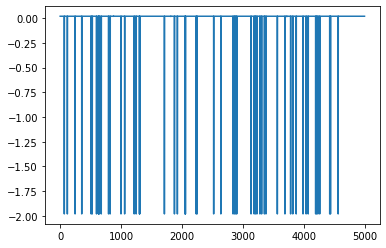

Of 5000 trajectories in |0>, 56 are found to be in |1>
There should be about 50 of these.


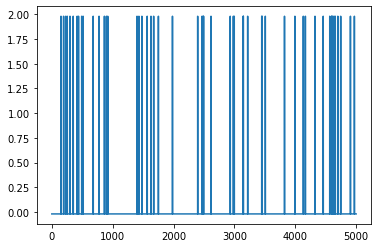

Of 5000 trajectories in |1>, 54 are found to be in |0>
There should be about 50 of these.


In [6]:
delta = 0.01 # slightly mix both eigenstates to avoid fixed point

transitions = z_plus_sigma_z[:,-1] -  z_plus_sigma_z[:, 0]
plt.plot(transitions)
plt.show()
print(f'Of {transitions.shape[0]} trajectories in |0>, {np.sum(transitions < 0)} are found to be in |1>')
print(f'There should be about {round(delta*transitions.shape[0])} of these.')

transitions = z_minus_sigma_z[:,-1] - z_minus_sigma_z[:, 0]
plt.plot(transitions)
plt.show()
print(f'Of {transitions.shape[0]} trajectories in |1>, {np.sum(transitions > 0)} are found to be in |0>')
print(f'There should be about {round(delta*transitions.shape[0])} of these.')

# Prepare datasets

###### Remove the $\delta * n_{traj}$ number of states from the $ \tilde{|0 \rangle }$ and $ \tilde{| 1 \rangle}$ that aren't actually in $|0 \rangle$ and $| 1 \rangle$. This cleans up the data so the classifier performance isn't hurt by the perturbation to their input data.

Of 5000 simulated trajectories originally prepared in |0>, 4944 remain.
Of 5000 simulated trajectories originally prepared in |1>, 4946 remain.


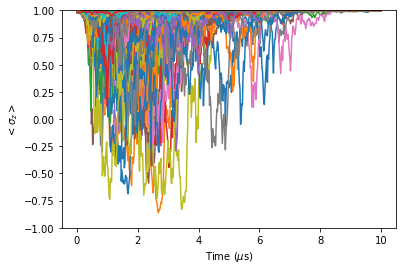

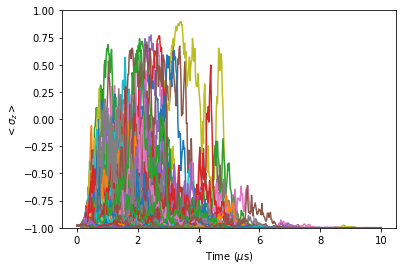

In [9]:
# remove the \delta amount of states that aren't in the ground state
transitions = z_plus_sigma_z[:,-1] -  z_plus_sigma_z[:, 0]
true_ground_sigma_z = []
true_ground_r_t = []
for i, _ in enumerate(z_plus_sigma_z):
    if transitions[i] >= 0:
        true_ground_sigma_z.append(z_plus_sigma_z[i])
        true_ground_r_t.append(z_plus_r_t[i])
true_ground_sigma_z = np.array(true_ground_sigma_z)
true_ground_r_t = np.array(true_ground_r_t)

transitions = z_minus_sigma_z[:,-1] -  z_minus_sigma_z[:, 0]
true_excited_sigma_z = []
true_excited_r_t = []
for i, _ in enumerate(z_minus_sigma_z):
    if transitions[i] <= 0:
        true_excited_sigma_z.append(z_minus_sigma_z[i])
        true_excited_r_t.append(z_minus_r_t[i])
true_excited_sigma_z = np.array(true_excited_sigma_z)
true_excited_r_t = np.array(true_excited_r_t)

print(f'Of {z_plus_sigma_z.shape[0]} simulated trajectories originally prepared in |0>, {true_ground_sigma_z.shape[0]} remain.')
print(f'Of {z_minus_sigma_z.shape[0]} simulated trajectories originally prepared in |1>, {true_excited_sigma_z.shape[0]} remain.')
plot_trajectories(trajectory_time, true_ground_sigma_z)
plot_trajectories(trajectory_time, true_excited_sigma_z)

Take only the first 1us of readout data.

In [23]:
# truncate datasets to 1us length
trunc_length = 51
trunc_time = trajectory_time[:trunc_length]
trunc_ground_r_t = true_ground_r_t[:,:trunc_length]
trunc_excited_r_t = true_excited_r_t[:, :trunc_length]
trunc_ground_sigma_z = true_ground_sigma_z[:, :trunc_length]
trunc_excited_sigma_z = true_excited_sigma_z[:, :trunc_length]

#plot_trajectories(trunc_time, trunc_ground_sigma_z)
#plot_trajectories(trunc_time, trunc_excited_sigma_z)

# Classify with Average

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


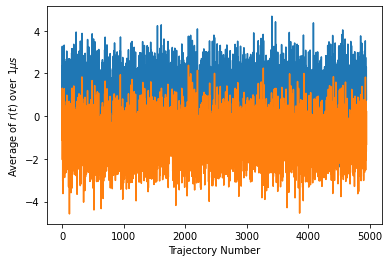

Of 4944 trajectories in |0>, 707 were found to be in |1>.
Of 4946 trajectories in |1>, 756 were found to be in |0>.
This corresponds to a readout fidelity of 0.7041


In [24]:
# define classifier
def average_classifier(r_t):
    return r_t.mean(axis=1)

# run classifier
average_classified_ground = average_classifier(trunc_ground_r_t)
average_classified_excited = average_classifier(trunc_excited_r_t)
plt.plot(average_classified_ground)
plt.plot(average_classified_excited)
plt.xlabel("Trajectory Number")
plt.ylabel(r"Average of $r(t)$ over $1 \mu s$")
plt.show()

# find how many trajectories from one state are being found in the other state
print(f'Of {trunc_ground_r_t.shape[0]} trajectories in |0>, {np.sum(average_classified_ground <= 0)} were found to be in |1>.')
print(f'Of {trunc_excited_r_t.shape[0]} trajectories in |1>, {np.sum(average_classified_excited >= 0)} were found to be in |0>.')
p_0_1 = np.sum(average_classified_ground <= 0)/trunc_ground_r_t.shape[0] # frequency of |0> states being found in |1>
p_1_0 = np.sum(average_classified_excited >= 0)/trunc_excited_r_t.shape[0] # frequency of |1> states being found in |0>

# compute readout fidelity
print(f'This corresponds to a readout fidelity of {round(1 - p_0_1 - p_1_0,4)}')

# MLP classification on r(t) directly

Train MLP classifier on first 4,000 trajectories of ground and excited states.

In [102]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,100,100,100),solver='adam', alpha=1e-5, random_state=1)
real_trunc_excited_r_t = np.real(trunc_excited_r_t[:,:,0])
real_trunc_ground_r_t = np.real(trunc_ground_r_t[:,:,0])

# only train on the first 4k trajectories, leave the rest for testing
train_real_trunc_excited_r_t = real_trunc_excited_r_t[:4000]
train_real_trunc_ground_r_t = real_trunc_ground_r_t[:4000]

X = np.vstack((train_real_trunc_excited_r_t, train_real_trunc_ground_r_t))
Y = np.concatenate((-np.ones(4000), np.ones(4000)))

classifier.fit(X,Y);

Evaluate performance

In [103]:
print(f"The classifier's score on the training data is {classifier.score(X, Y)}")

# run classifier on ~1k test poitns
test_data_result_ground = classifier.predict(real_trunc_ground_r_t[4000:])
test_data_result_excited = classifier.predict(real_trunc_excited_r_t[4000:])

# compute readout fidelity
p_0_1 = np.sum(test_data_result_ground <= 0)/test_data_result_ground.shape[0] # frequency of |0> states being found in |1>
p_1_0 = np.sum(test_data_result_excited >= 0)/test_data_result_excited.shape[0] # frequency of |1> states being found in |0>

print(f"A |0> qubit has a probability of {round(p_0_1,3)} of being found in |1>, and a |1> qubit has a probability of {round(p_1_0, 3)} of being found in |0>")
print(f"This is a readout fidelity of {round(1 - p_0_1 - p_1_0, 3)}")

The classifier's score on the training data is 0.999625
A |0> qubit has a probability of 0.188 of being found in |1>, and a |1> qubit has a probability of 0.167 of being found in |0>
This is a readout fidelity of 0.645


# MLP classification on cumulative integral of r(t)

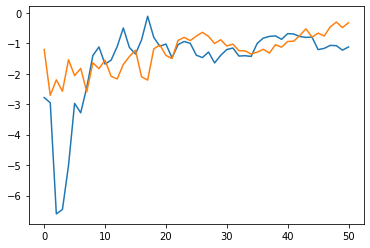

In [112]:
# evaluate cumulative integral on the truncated r_t curves for the ground and excited states
def integrate_row(row):
    return np.real(np.cumsum(row)/np.arange(1, len(row)+1))

def integrate(x):
    return np.apply_along_axis(integrate_row, 1, x)

classifier = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),solver='adam', alpha=1e-5, random_state=1)
X = np.vstack((integrate(train_real_trunc_excited_r_t), integrate(train_real_trunc_ground_r_t)))
Y = np.concatenate((-np.ones(4000), np.ones(4000)))

classifier.fit(X,Y);

In [113]:
print(f"The classifier's score on the training data is {classifier.score(X, Y)}")

# run classifier on ~1k test poitns
test_data_result_ground = classifier.predict(integrate(real_trunc_ground_r_t[4000:]))
test_data_result_excited = classifier.predict(integrate(real_trunc_excited_r_t[4000:]))

# compute readout fidelity
p_0_1 = np.sum(test_data_result_ground <= 0)/test_data_result_ground.shape[0] # frequency of |0> states being found in |1>
p_1_0 = np.sum(test_data_result_excited >= 0)/test_data_result_excited.shape[0] # frequency of |1> states being found in |0>

print(f"A |0> qubit has a probability of {round(p_0_1,3)} of being found in |1>, and a |1> qubit has a probability of {round(p_1_0, 3)} of being found in |0>")
print(f"This is a readout fidelity of {round(1 - p_0_1 - p_1_0, 3)}")

The classifier's score on the training data is 0.870125
A |0> qubit has a probability of 0.123 of being found in |1>, and a |1> qubit has a probability of 0.134 of being found in |0>
This is a readout fidelity of 0.743


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0211f19d-54e4-44e5-ab1c-ce7a6a2d44df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>